# Bank Loan - Default Prediction

## Objective: 



In [1]:
# The project is to predict whether the new applicants for loan application will default or not-default basis 
# the dataset provided. 


## Type of Problem:


In [2]:
# From the given data set it is understood that the problem statement is a #Supervised Learning Classification Problem
# where we have 8 Independent variables also called Predictors and 1 #Dependent variable also called Target variable.
# Independent Variables: age, education, employment, address, income, #debtinc, creddebt, othdebt
# Dependent Variable: default


In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from pandas.plotting import scatter_matrix
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score , precision_recall_curve
from sklearn.metrics import roc_curve, auc
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from joblib import dump,load


In [4]:
os.chdir(r"C:\Users\Sumit\Desktop\Deployment Methods\Deployment in Heroku\Bank Loan Default Prediction")
os.getcwd()

'C:\\Users\\Sumit\\Desktop\\Deployment Methods\\Deployment in Heroku\\Bank Loan Default Prediction'

In [5]:
bank_loan = pd.read_csv("bank-loan.csv")

In [6]:
bank_loan.shape

(850, 9)

In [7]:
bank_loan.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


## Total number of observations are 850 and columns 9

In [8]:
bank_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       850 non-null    int64  
 1   ed        850 non-null    int64  
 2   employ    850 non-null    int64  
 3   address   850 non-null    int64  
 4   income    850 non-null    int64  
 5   debtinc   850 non-null    float64
 6   creddebt  850 non-null    float64
 7   othdebt   850 non-null    float64
 8   default   700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 59.9 KB


In [9]:
bank_loan.describe()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000
mean,35.029412,1.710588,8.565882,8.371765,46.675294,10.171647,1.576805,3.078789,0.261429
std,8.041432,0.927784,6.777884,6.895016,38.543054,6.719441,2.125840,3.398803,0.439727
min,20.000000,1.000000,0.000000,0.000000,13.000000,0.100000,0.011696,0.045584,0.000000
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.100000,0.382176,1.045942,0.000000
50%,34.000000,1.000000,7.000000,7.000000,35.000000,8.700000,0.885091,2.003243,0.000000
75%,41.000000,2.000000,13.000000,12.000000,55.750000,13.800000,1.898440,3.903001,1.000000
max,56.000000,5.000000,33.000000,34.000000,446.000000,41.300000,20.561310,35.197500,1.000000


## Creating dummies of a categorical variable "ed"


In [10]:
bank_loan = pd.get_dummies(bank_loan, columns=["ed"])
bank_loan

,age,employ,address,income,debtinc,creddebt,othdebt,default,ed_1,ed_2,ed_3,ed_4,ed_5
0,41,17,12,176,9.3,11.359392,5.008608,1.0,0,0,1,0,0
1,27,10,6,31,17.3,1.362202,4.000798,0.0,1,0,0,0,0
2,40,15,14,55,5.5,0.856075,2.168925,0.0,1,0,0,0,0
3,41,15,14,120,2.9,2.658720,0.821280,0.0,1,0,0,0,0
4,24,2,0,28,17.3,1.787436,3.056564,1.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,34,12,15,32,2.7,0.239328,0.624672,NaN,1,0,0,0,0
846,32,12,11,116,5.7,4.026708,2.585292,NaN,0,1,0,0,0
847,48,13,11,38,10.8,0.722304,3.381696,NaN,1,0,0,0,0
848,35,1,11,24,7.8,0.417456,1.454544,NaN,0,1,0,0,0


## Missing Value Analysis

In [11]:
#Checking Missing Values
missing_values = pd.DataFrame(bank_loan.isnull().sum())
#Reseting Index
missing_values = missing_values.reset_index()
missing_values

,index,0
0,age,0
1,employ,0
2,address,0
3,income,0
4,debtinc,0
5,creddebt,0
6,othdebt,0
7,default,150
8,ed_1,0
9,ed_2,0


In [12]:
#Renaming the column names of the dataframe
missing_values = missing_values.rename(columns = {'index' : 'Variables', 0 : 'Missing Percentage'})
missing_values
#Calculating % of missing values
missing_values["Missing Percentage"] = (missing_values["Missing Percentage"]/len(bank_loan))*100
missing_values
#Sorting by Missing Percentage
missing_values = missing_values.sort_values("Missing Percentage", ascending = False).reset_index(drop=True)
missing_values

,Variables,Missing Percentage
0,default,17.647059
1,age,0.000000
2,employ,0.000000
3,address,0.000000
4,income,0.000000
5,debtinc,0.000000
6,creddebt,0.000000
7,othdebt,0.000000
8,ed_1,0.000000
9,ed_2,0.000000


In [13]:
# It is observed that we do not have missing values in any of the predictors
# However the Dependent variable has missing values
# Observations with missing values in Dependent Variable cannot offer any information in prediction of any case
# Since it is a response variable, we will remove these observations with the missing values.

## Dropping observations having missing values in Target Variable



In [14]:
new_dataset = bank_loan.dropna(how='any', subset=['default'])
new_dataset.shape

(700, 13)

In [15]:
new_dataset.describe()

,age,employ,address,income,debtinc,creddebt,othdebt,default,ed_1,ed_2,ed_3,ed_4,ed_5
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,34.860000,8.388571,8.278571,45.601429,10.260571,1.553553,3.058209,0.261429,0.531429,0.282857,0.124286,0.054286,0.007143
std,7.997342,6.658039,6.824877,36.814226,6.827234,2.117197,3.287555,0.439727,0.499368,0.450710,0.330143,0.226743,0.084273
min,20.000000,0.000000,0.000000,14.000000,0.400000,0.011696,0.045584,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,3.000000,3.000000,24.000000,5.000000,0.369059,1.044178,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,34.000000,7.000000,7.000000,34.000000,8.600000,0.854869,1.987567,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,40.000000,12.000000,12.000000,55.000000,14.125000,1.901955,3.923065,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,56.000000,31.000000,34.000000,446.000000,41.300000,20.561310,27.033600,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##  Histograms for Data understanding

In [16]:
#Imbalance Data : Target variable data has imbalanced data 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014412BC7C10>,
      dtype=object)

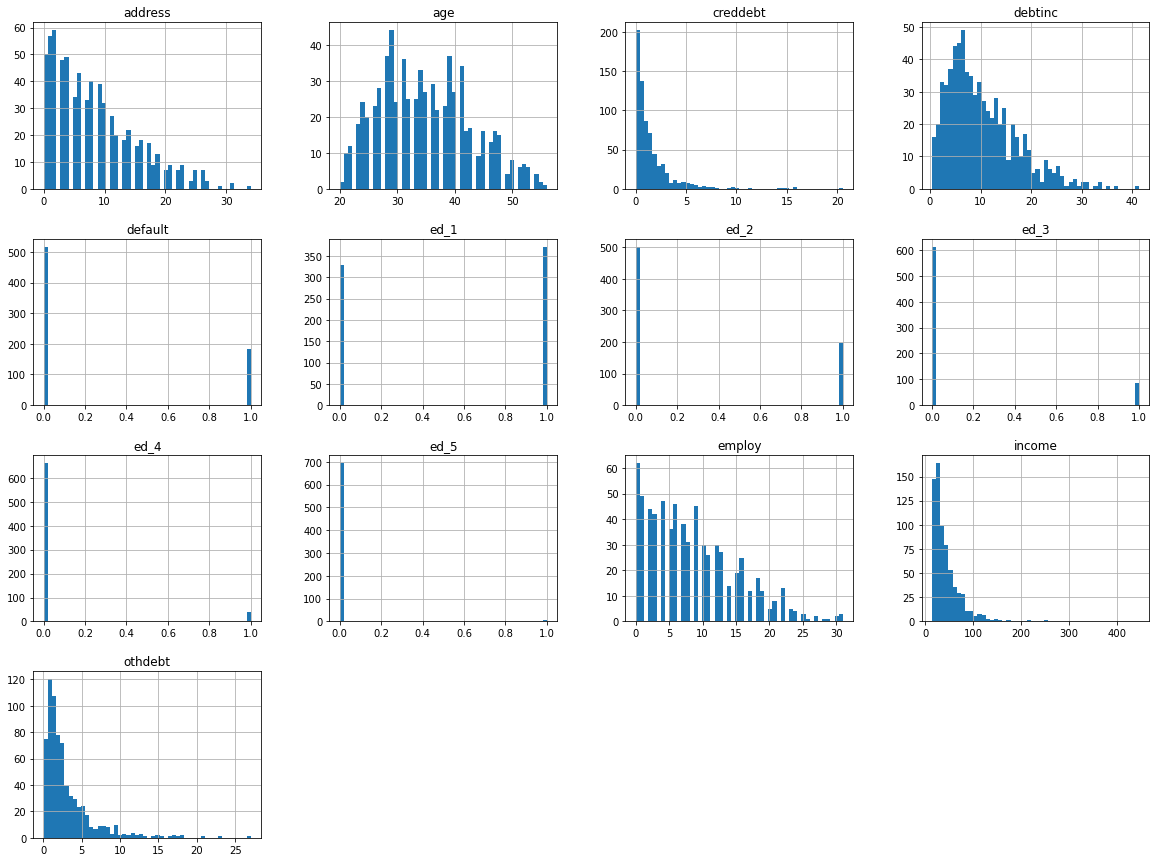

In [17]:
new_dataset.hist(bins = 50, figsize = (20,15))

## Graph between debtinc and default: 

In [18]:
#FacetGrid graph plotted between debtinc and default shows that with the increase of debtinc default cases increases.
#Between 0 to 15 debtinc 80% of the individuals are non-defaulters.
#Defaulting cases increases with the increase of debtinc from 15 onwards majorly.

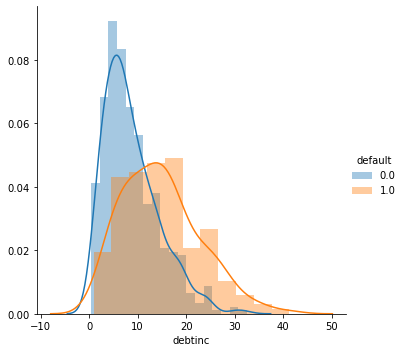

In [19]:
sns.FacetGrid(new_dataset, hue="default", size=5) \
   .map(sns.distplot, "debtinc") \
   .add_legend();
plt.show();

## Graph between creddebt and default: 

In [20]:
#FacetGrid graph plotted between creddebt and default shows that with the increase of creddebt default cases increases.
#Between 0 to 2 creddebt 78% of the individuals are non-defaulters. 
#Defaulting cases increases with the increase of creddebt from 2 onwards majorly.

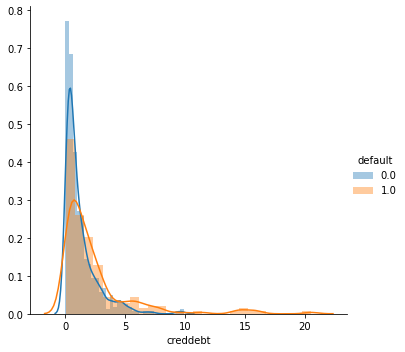

In [21]:
sns.FacetGrid(new_dataset, hue="default", size=5) \
   .map(sns.distplot, "creddebt") \
   .add_legend();
plt.show();

## Graph between creddebt and default: 

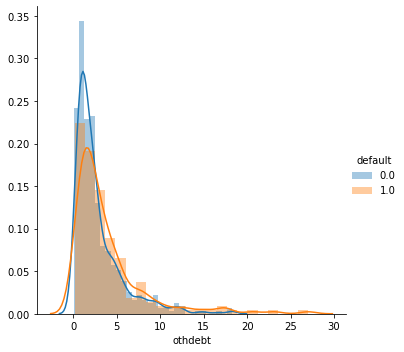

In [22]:
sns.FacetGrid(new_dataset, hue="default", size=5) \
   .map(sns.distplot, "othdebt") \
   .add_legend();
plt.show();

## Outlier Analysis

In [23]:
df = new_dataset.copy()

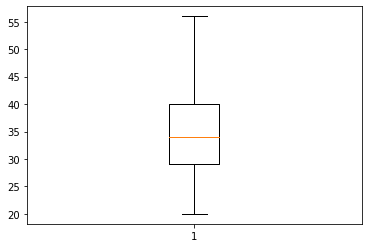

In [24]:
boxplot = plt.boxplot(df["age"])


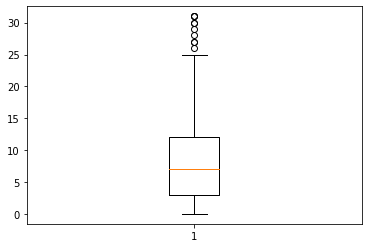

In [25]:
boxplot = plt.boxplot(df["employ"])

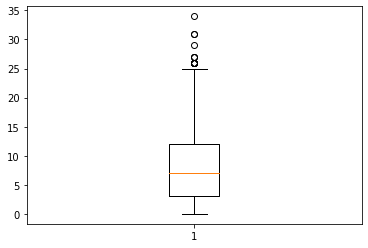

In [26]:
boxplot = plt.boxplot(df["address"])

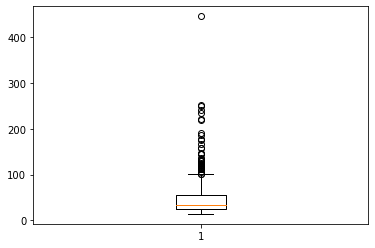

In [27]:
boxplot = plt.boxplot(df["income"])

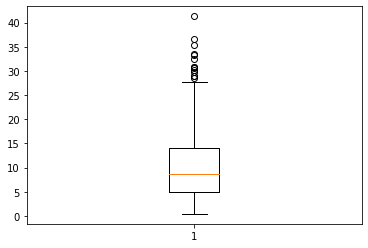

In [28]:
boxplot = plt.boxplot(df["debtinc"])

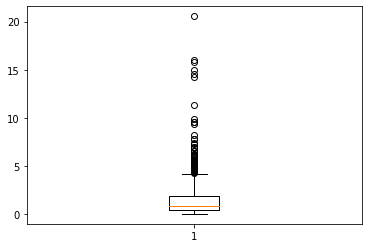

In [29]:
boxplot = plt.boxplot(df["creddebt"])

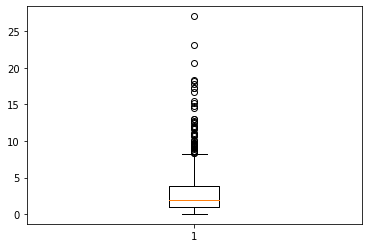

In [30]:
boxplot = plt.boxplot(df["othdebt"])

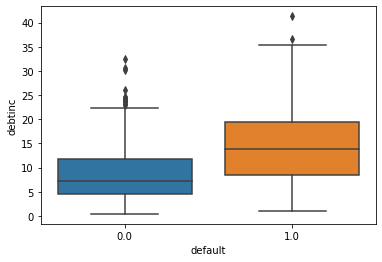

In [31]:
ax = sns.boxplot(x="default", y="debtinc", data=df)

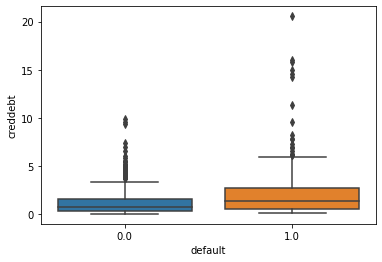

In [32]:
ax = sns.boxplot(x="default", y="creddebt", data=df)

In [33]:
# All the attributes have outliers except age.
# But it has been observed that the attributes given can have the extreme values and we cannot limit it to certain percentile.
# If we will remove the outliers highlighted  through boxplot will result in loss of all the relevant data.

## To save the relevant data not removed or replaced outliers

## Feature Selection - Correlation Analysis

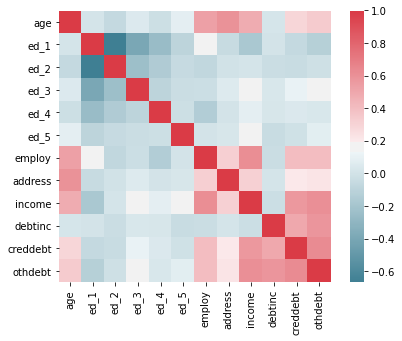

In [34]:
# Correlation Plot
cont_names = ['age','ed_1','ed_2','ed_3','ed_4','ed_5','employ','address','income','debtinc','creddebt','othdebt']
df_corr = df.loc[:,cont_names]
#Set the width and height of the plot
f, ax = plt.subplots(figsize = (7,5))
#Generate correlation matrix
corr = df_corr.corr()
#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr,dtype=np.bool), cmap = sns.diverging_palette(220,10, as_cmap = True),square=True,ax=ax)


In [35]:
corr_matrix = df.corr()
corr_matrix
corr_matrix['default'].sort_values(ascending=False)

default     1.000000
debtinc     0.389575
creddebt    0.244740
othdebt     0.145713
ed_3        0.071502
ed_4        0.058337
ed_2        0.052241
ed_5       -0.011857
income     -0.070970
ed_1       -0.118909
age        -0.137657
address    -0.164451
employ     -0.282978
Name: default, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001441429BA90>,
      dtype=object)

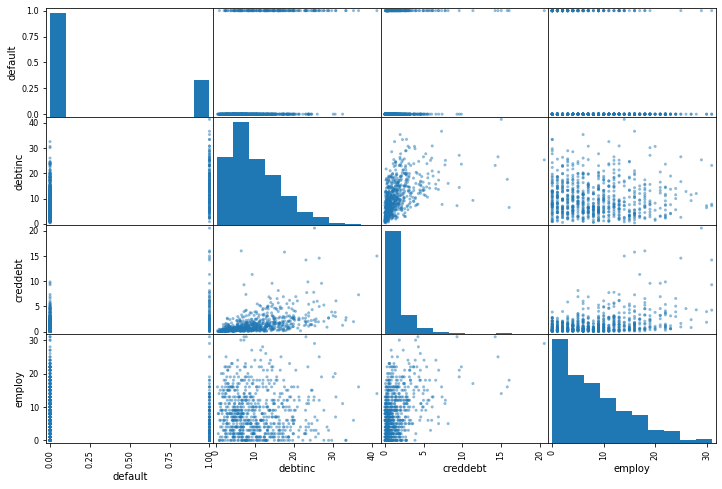

In [36]:
attributes = ["default", "debtinc", "creddebt", "employ"]
scatter_matrix(df[attributes],figsize=(12,8))
#df.plot(kind = "scatter",x="othdebt", y ="default", alpha = 0.8)
#df.plot(kind = "scatter",x="creddebt", y ="default", alpha = 0.8)

## Features Selected

In [37]:
feature_selected = ["creddebt","debtinc","employ"]


## Features Dropped

In [38]:
df = df.drop(["ed_1","ed_2","ed_3","ed_4","ed_5","age","address","income","othdebt"] , axis=1)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 0 to 699
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   employ    700 non-null    int64  
 1   debtinc   700 non-null    float64
 2   creddebt  700 non-null    float64
 3   default   700 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 47.3 KB


## Feature Scaling

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014413BE27F0>,
      dtype=object)

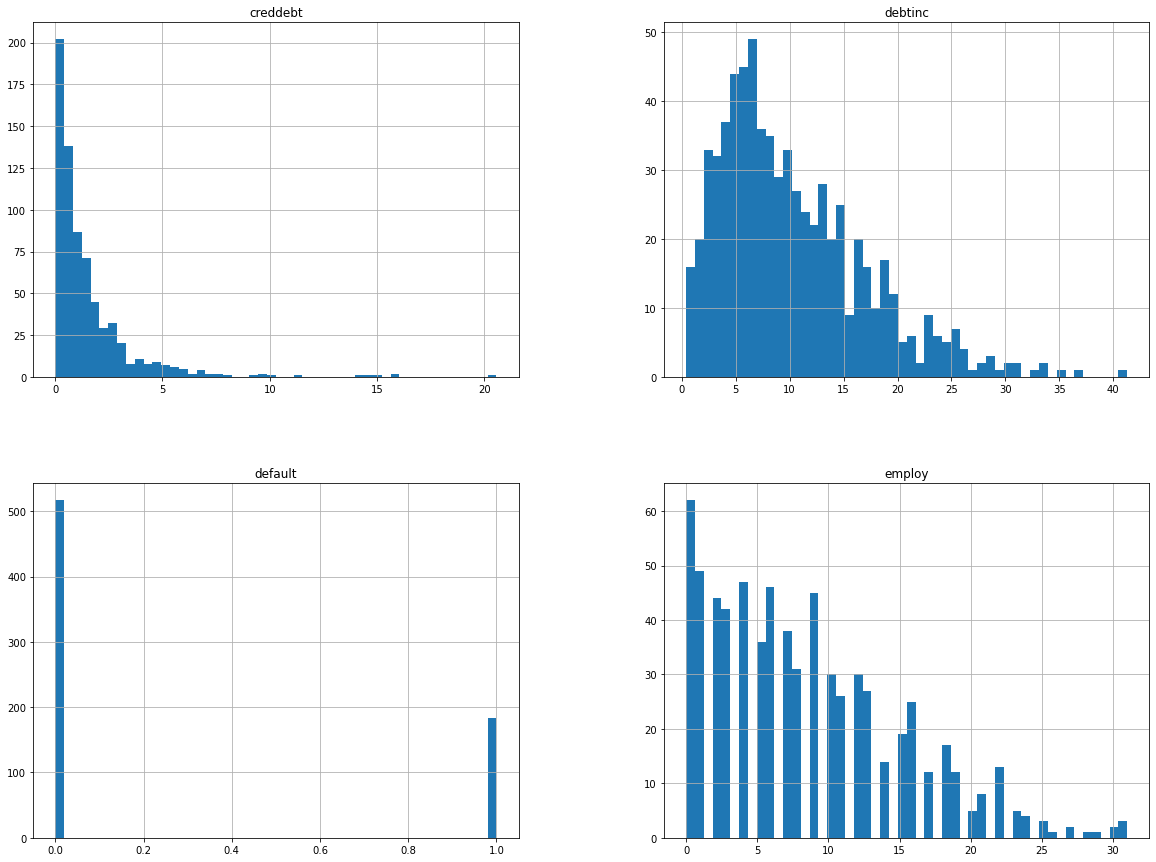

In [40]:
#Normality Check
df.hist(bins = 50, figsize = (20,15))

In [41]:
for i in feature_selected:
    print(i)
    df[i] = (df[i]-min(df[i]))/(max(df[i])-min(df[i]))

creddebt
debtinc
employ


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014413D223A0>,
      dtype=object)

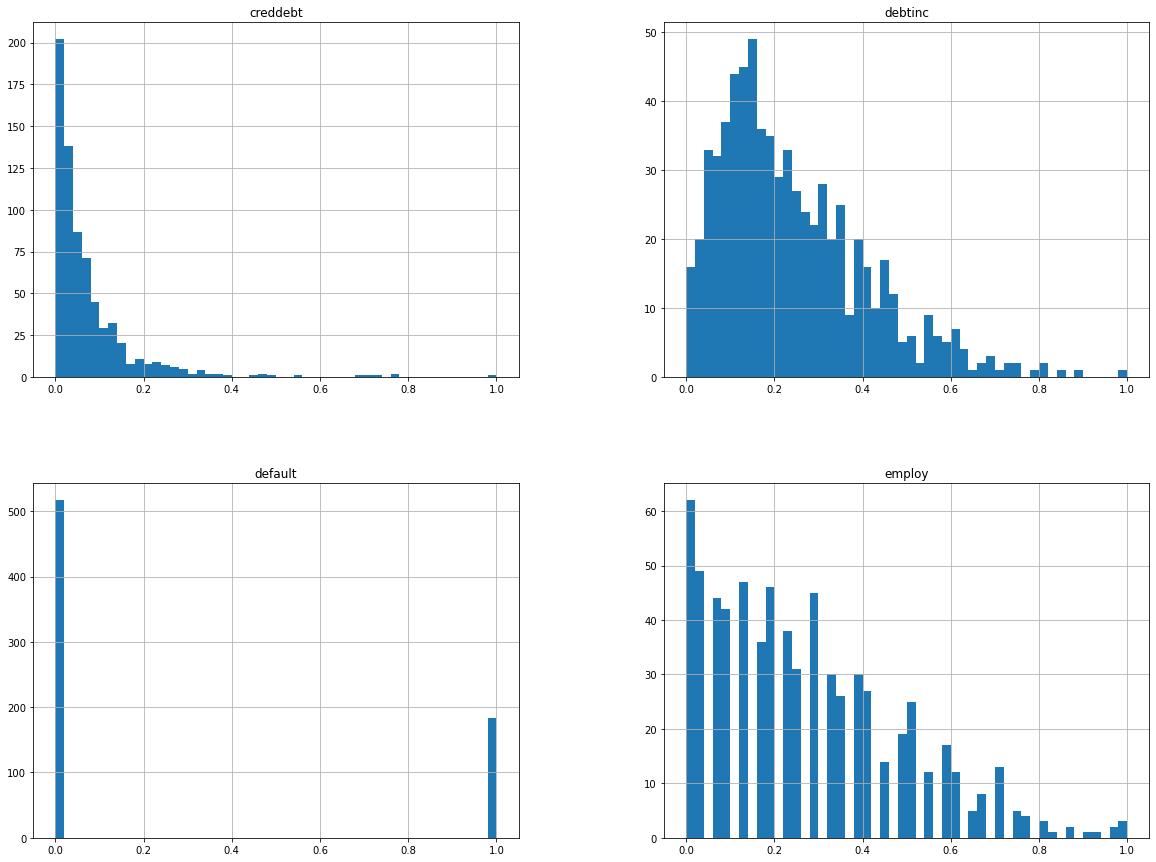

In [42]:
df.hist(bins = 50, figsize = (20,15))

## Over-sampling target Variable

In [43]:
y = df["default"]
x = df.drop("default",axis=1)
x.shape, y.shape

((700, 3), (700,))

In [44]:
smk = SMOTETomek(random_state=42)
x1, y1= smk.fit_sample(x,y)
x1.shape, y1.shape

((980, 3), (980,))

In [45]:
x_df = pd.DataFrame(x1)
y_df = pd.DataFrame(y1)

## Feature Sampling 

## Data Splitting in 80-20 train-test split

In [46]:
# Splitting the data into train and test subset using Stratified Sampling Method
# Using "target variable" as a stratifing factor
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2, stratify = y_df, random_state =42 )

## Model Development

In [47]:
# Since the problem statement is a Classification-Supervised Learning Problem, so we use the below shown different algorithms
# for developing a model having high accurancy rate and low error rate.

In [48]:
# Defining the proper parameters
# confusion matrix:
#            It is a summary of prediction results on a classification problem. The number of correct and incorrect 
#            predictions are summarized with count values and broken down by each class. It gives us insight not only
#            into the errors being made by a classifier but more importantly the types of errors that are being made.

# True Negative(TN):
#             Observation is negative, and is predicted to be negative. 

# False Positive(FP):
#             Observation is negative, and is predicted to be positive. 

# False Negative(FN):
#             Observation is positive, and is predicted to be negative. 

# True Positive(TP):
#             Observation is positive, and is predicted to be positive.


In [49]:
#TN = conf_mat.iloc[1,1]
#FP = conf_mat.iloc[1,0]
#FN = conf_mat.iloc[0,1]
#TP = conf_mat.iloc[0,0]
#TN, FP, FN, TP

In [50]:
# Classification Rate/Accuracy Rate:
#                                  It is how accurately model is classified. TP+TN/(TP+TN+FP+FN)
# Misclassification Rate/Error Rate:
#                                  Percent of misclassified records out of the total records in the validation data.
#                                  FP+FN/(TP+TN+FP+FN)
# Recall(sensitivity):
#                                  Recall can be defined as the ratio of the total number of correctly classified positive
#                                  examples divide to the total number of positives plus the number of false negatives.
#                                  High Recall indicates the class is correctly recognized (a small number of FN).
#                                  TP/(TP+FN)
# Precision:
#                                  Precision is the ratio of correctly predicted positive observations to the total predicted
#                                  positive observations. High precision relates to the low false positive rate
#                                  TP/(TP+FP)
# High recall, low precision:      
#                                  This means that most of the positive examples are correctly recognized (low FN)
#                                  but there are a lot of false positives.

# Low recall, high precision: 
#                                  This shows that we miss a lot of positive examples (high FN) but those we predict
#                                  as positive are indeed positive (low FP)
# Specificity :
#                                  The proportion of actual negative cases which are correctly identified
#                                  TN/(TN+FP)
# False Positive Rate:             FP/(FP+TN)                                 
# False Negative Rate:             FN/(FN+TP)
# F1-Score:                        (2 x Precision x Recall) / (Precision + Recall)


## Random Forest Algorithm Using RandomForestClassifier()


## Random Forest Algorithm - Estimators = 500

In [51]:
model_RF1 = RandomForestClassifier(n_estimators = 500).fit(x_train,y_train)
y_predict_RF1 = model_RF1.predict(x_test)
y_predict_RF1_prob = model_RF1.predict_proba(x_test)

In [52]:
import pickle
filename_RF1 = 'RF1_500.pkl'
pickle.dump(model_RF1, open(filename_RF1, 'wb'))
RF_load_pickle = pickle.load(open(filename_RF1, 'rb'))


In [53]:
# Creating Confusion Matrix
CM = pd.DataFrame(
    confusion_matrix(y_test, y_predict_RF1, labels=[0, 1]), 
    index=[0, 1], 
    columns=[0, 1]
)

CM

,0,1
0,85,13
1,16,82


In [54]:
TN, FP, FN, TP = confusion_matrix(y_test,y_predict_RF1).ravel()
TN, FP, FN, TP

(85, 13, 16, 82)

In [55]:
#Accuracy
accuracy = (TP+TN)*100/(TP+TN+FP+FN)
accuracy

85.20408163265306

In [56]:
#Recall & Precision
recall=(TP)/(TP+FN)
precision = (TP)/(TP+FP)
F1_score = (2*precision*recall)/(precision+recall)
recall, precision,F1_score

(0.8367346938775511, 0.8631578947368421, 0.8497409326424872)

In [57]:
FNR = (FN*100)/(FN+FP)
FPR = (FP*100)/(FP+FN)
FNR,FPR

(55.172413793103445, 44.827586206896555)

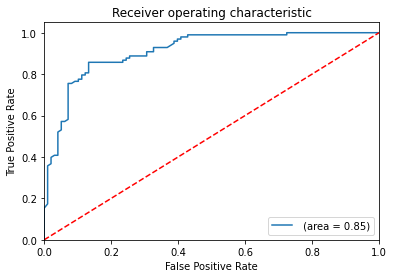

In [58]:
# ROC_AUC CURVE
roc_auc = roc_auc_score(y_test, y_predict_RF1)
fpr, tpr, thresholds = roc_curve(y_test, y_predict_RF1_prob[:,1],)
plt.figure()
plt.plot(fpr, tpr, label=' (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

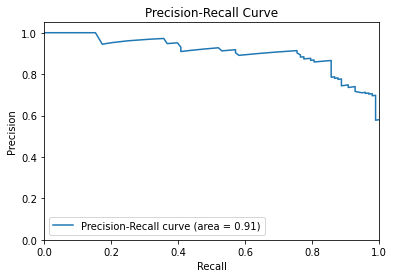

In [59]:
# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_predict_RF1_prob[:,1],)

plt.figure()
plt.plot(recall, precision, label='Precision-Recall curve (area = %0.2f)' % auc(recall, precision))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

In [60]:
#Model	                                        #Accuracy% F1-Score ROC-AUC PR-Curve FNR    FPR
#Logistic Regression	                            73.47	0.73	0.73	0.85	51.92	48.08
#Decision Tree	                                    78.06	0.77	0.78	0.80	60.46	39.53
#Random Forest Estimators-100	                    83.16	0.83	0.83	0.90	51.51	48.48
#Random Forest Estimators-500	                    84.69	0.84	0.83	0.90	53.33	46.66
#Naïve Bayes	                                    70.92	0.65	0.71	0.81	78.95	21.05
#SVM	                                            72.96	0.73	0.73	0.80	49.06	50.94
#kNN	                                            79.08	0.80	0.79	0.84	34.16	65.85
#XGBoost	                                        81.63	0.82	0.82	0.86	47.22	52.78


In [61]:
# Algorithms in Python:
# Accuracy: Machine learning model accuracy is the measurement used to determine which model is best at identifying 
# relationships and patterns between variables in a dataset based on the input, or training, data.

#F1-Score: F1-Score or F-measure is an evaluation metric for a classification defined as harmonic mean of precision and recall.
#It is a statistical measure of accuracy of a test or model. It gives the combined information about the precision and recall
#of a model. Means high F1-score indicates high value for both recall and precision. Generally, F1-score is used when we need
#to compare two or more machine learning algorithms for same data. We opt for the algorithm whose f1 score is higher.
#F-measure has an intuitive meaning. It tells you how precise your classifier is (how many instances it classifies correctly),
#as well as how robust it is (it does not miss a significant number of instances).

#ROC-AUC Curve: ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model
#is capable of distinguishing between classes. ... By analogy, Higher the AUC, better the model is at distinguishing.

#Precision-Recall Curve: PR curve has the Recall value (TPR) on the x-axis, and precision = TP/(TP+FP) on the y-axis. 
#Precision helps highlight how relevant the retrieved results are, which is more important while judging an IR system.
#Hence, a PR curve is often more common around problems involving information retrieval.
#It is desired that the algorithm should have both high precision, and high recall. However, most machine learning algorithms
#often involve a trade-off between the two. A good PR curve has greater AUC (area under curve)

#False Negative Rate: When the test says you don’t have it but you actually have it.
#False Positive Rate: When the test says you have it but you actually don’t have it.


## So in our case high False Negative rate will affect more to our model performance. As if a new applicant is a default but
## we predict it as non-defaulter then it will adversely affect bank.

In [62]:
# Python : Now while comparing the performances of all the algorithms in Python it is clear that 
# Random Forest Estimator = 500 worked great for our problem. 
# High Accuracy score  84.69% 
# High F1 score 0.84
# High ROC-AUC 0.83
# High PR 0.90
# Less FNR comparatively - 53.33%
# Less FPR comparatively – 46.66%


In [63]:

#Project Deployment:
#Python : In machine learning,  we need to save the trained models in a file and restore them in order to reuse it to 
#compare the model with other models, to test the model on a new data. The saving of data is called Serializaion, while
#restoring the data is called Deserialization.
#Also, we deal with different types and sizes of data. Some datasets are easily trained i.e- they take less time to train
#but the datasets whose size is large (more than 1GB) can take very large time to train on a local machine even with GPU. 
#When we need the same trained data in some different project or later sometime, to avoid the wastage of the training time, 
#store trained model so that it can be used anytime in the future.
#There are two ways we can save a model in scikit learn:
#Pickle string: The pickle module implements a fundamental, but powerful algorithm for serializing and de-serializing a Python
#object structure.
#Pickle model provides the following functions –
#pickle.dump to serialize an object hierarchy, you simply use dump().
#pickle.load to deserialize a data stream, you call the loads() function.

#Pickled model as a file using joblib: Joblib is the replacement of pickle as it is more efficent on objects that carry large
#numpy arrays. These functions also accept file-like object instead of filenames.
#joblib.dump to serialize an object hierarchy
#joblib.load to deserialize a data stream
